In [118]:
from glob import glob
import locale
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
locale.setlocale(locale.LC_ALL,'pt')

'pt'

# Função para formatar os dados

Os dados precisam estar baixados em csv e estar nas suas raspectivas pastas.

In [120]:
def format_ons_open_data( folder_name:str, columns:list[str], subsystems:list[str]=['NE','N','SE','S'], index_item:int=0)->pd.DataFrame:
    
    paths = glob(f'{folder_name}/*')
    columns = columns
    id_subs = subsystems
    dataframe_dict = dict(zip(id_subs, [pd.DataFrame()]*len(id_subs)))

    for path in paths:
        df = pd.read_csv(path, sep=';')

        for key in dataframe_dict.keys():
            aux = df.loc[df['id_subsistema']==key].copy()
            aux.index = pd.to_datetime(aux[columns[index_item]])
            aux = aux[[element for element in columns if element != columns[index_item]]].copy()
            aux.columns = [element + f'_{key}' for element in aux.columns]
            dataframe_dict[key] = pd.concat([dataframe_dict[key], aux])

    return pd.concat(list(dataframe_dict.values()),axis=1)

# Criação dos principais dataframes já formatados.

In [121]:
final_EAR_dataframe = format_ons_open_data('EAR', ['ear_data', 'ear_max_subsistema','ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual'])

In [122]:
final_CMO_dataframe = format_ons_open_data('CMO_SEMANAL',['din_instante', 'val_cmomediasemanal', 'val_cmoleve', 'val_cmomedia', 'val_cmopesada'])

In [123]:
final_EAR_dataframe.head()

,ear_max_subsistema_NE,ear_verif_subsistema_mwmes_NE,ear_verif_subsistema_percentual_NE,ear_max_subsistema_N,ear_verif_subsistema_mwmes_N,ear_verif_subsistema_percentual_N,ear_max_subsistema_SE,ear_verif_subsistema_mwmes_SE,ear_verif_subsistema_percentual_SE,ear_max_subsistema_S,ear_verif_subsistema_mwmes_S,ear_verif_subsistema_percentual_S
ear_data,,,,,,,,,,,,
2000-01-01,49967.0,11171.0,22.360001,12311.0,7656.0,62.189999,155759.0,27853.0,17.879999,13976.0,7094.0,50.759998
2000-01-02,49967.0,11395.0,22.809999,12311.0,7947.0,64.550003,155759.0,28671.0,18.410000,13976.0,7084.0,50.689999
2000-01-03,49967.0,11523.0,23.059999,12311.0,8369.0,67.980003,155759.0,30000.0,19.260000,13976.0,7016.0,50.200001
2000-01-04,49967.0,11754.0,23.520000,12311.0,8735.0,70.949997,155759.0,31898.0,20.480000,13976.0,6980.0,49.939999
2000-01-05,49967.0,12032.0,24.080000,12311.0,9099.0,73.910004,155759.0,33627.0,21.590000,13976.0,6946.0,49.700001


# Dados de PLD encontrados no site da CCEE utilizados para comparação com o CMO

In [124]:
PLD = pd.read_csv('PLD/pld.csv',sep=';',parse_dates=[3,4], index_col=[4]).iloc[1:]

In [125]:
PLD = PLD[PLD.columns[4:]]

In [126]:
plot_df = pd.DataFrame()

In [127]:
plot_df['CMO_SUDESTE'] = final_CMO_dataframe[final_CMO_dataframe.columns[[11]]]
plot_df['PLD_SUDESTE'] = PLD['SUDESTE'][PLD.index>='2005-01-01']
#plot_df['EAR_TOTAL'] = final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100

# Comparação entre PLD e CMO

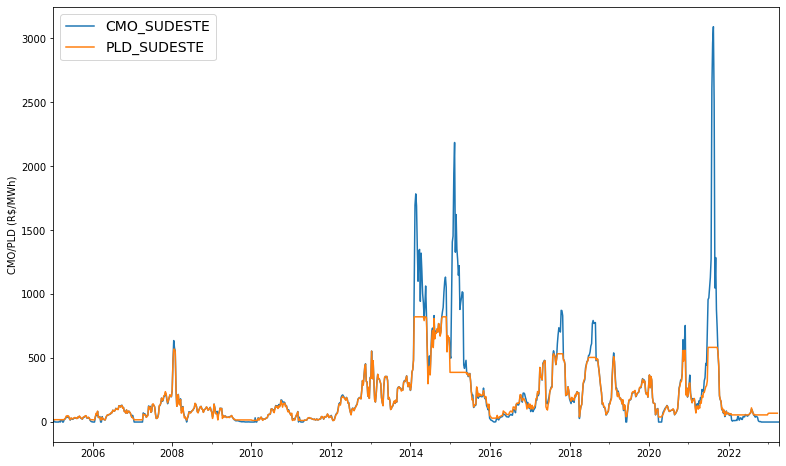

In [128]:
plot_df.plot(figsize=(13,8), xlabel='', ylabel='CMO/PLD (R$/MWh)')
plt.legend(fontsize=14)
#plt.savefig('FIGURAS\\pldvscmo.jpg', dpi=300)

<AxesSubplot:xlabel='DATA_FIM'>

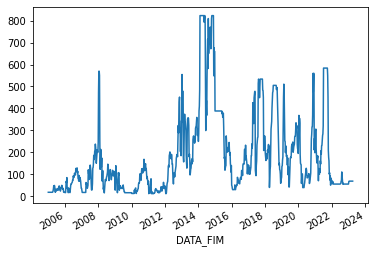

In [129]:
PLD['SUDESTE'][PLD.index>='2005-01-01'].plot()

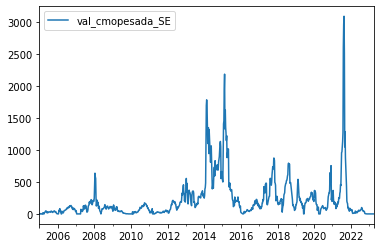

In [130]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[[11]]]).plot(xlabel='')

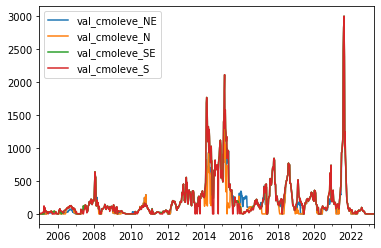

In [131]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[1::4]]).plot(xlabel='')

# Evolução da EAR máxima do SIN

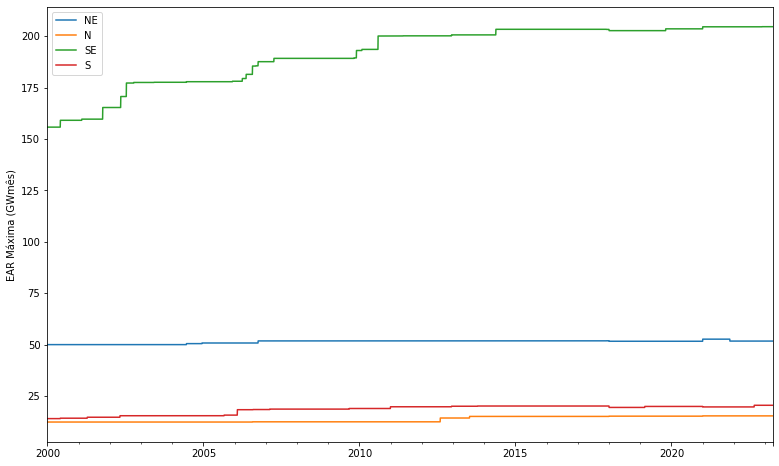

In [132]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='',figsize=(13,8))
ax.legend(['NE','N','SE','S'])
plt.savefig('FIGURAS\\evolucao_do_EAR.svg')

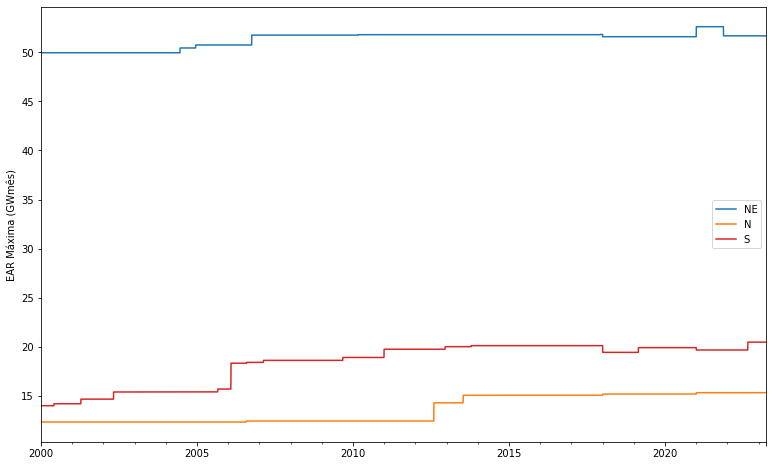

In [133]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='',figsize=(13,8))
ax.lines[2].remove()
#ax.set_ylim([5,60])
ax.relim()
ax.autoscale_view()
ax.legend(['NE','N','S'])
plt.savefig('FIGURAS\evolucao_do_EAR_zoom.svg')

# Criação de série com a EAR total do SIN em porcentagem

In [134]:
EAR_total_sin_porcentagem = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100)

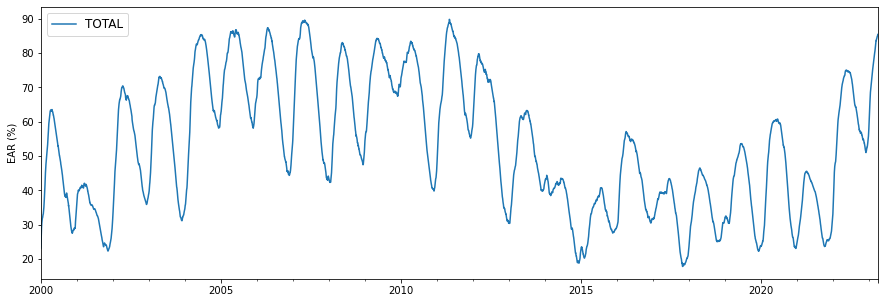

In [135]:
ax = EAR_total_sin_porcentagem.plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
ax.legend(['TOTAL'], loc='upper left', fontsize=12)
#ax.set_ylim([0,100])
plt.savefig('FIGURAS\\EAR_todo_período.svg')

# Visualização do CMO durante a crise hídrica de 2021

<AxesSubplot:xlabel='din_instante'>

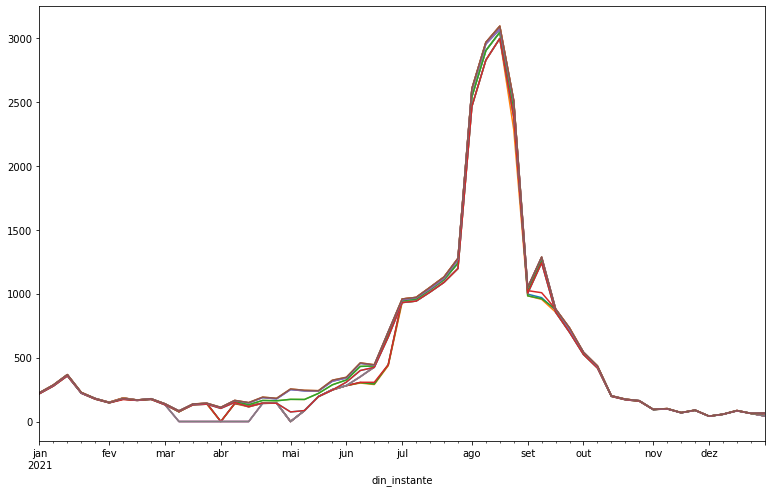

In [136]:
final_CMO_dataframe[final_CMO_dataframe.index.year==2021].plot(legend='',figsize=(13,8))

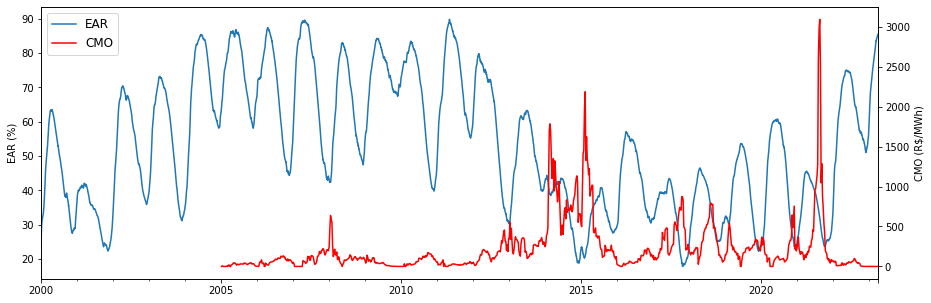

In [137]:
ax = EAR_total_sin_porcentagem.plot(ylabel='EAR (%)', xlabel='', figsize=(15,5), label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.columns[11]].index
ax2.plot(x,y, color='red', label='CMO')
ax2.set_ylabel('CMO (R$/MWh)')

line2 = ax2.lines

lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper left', fontsize=12)

plt.savefig('FIGURAS\\EARvsCMO.svg')

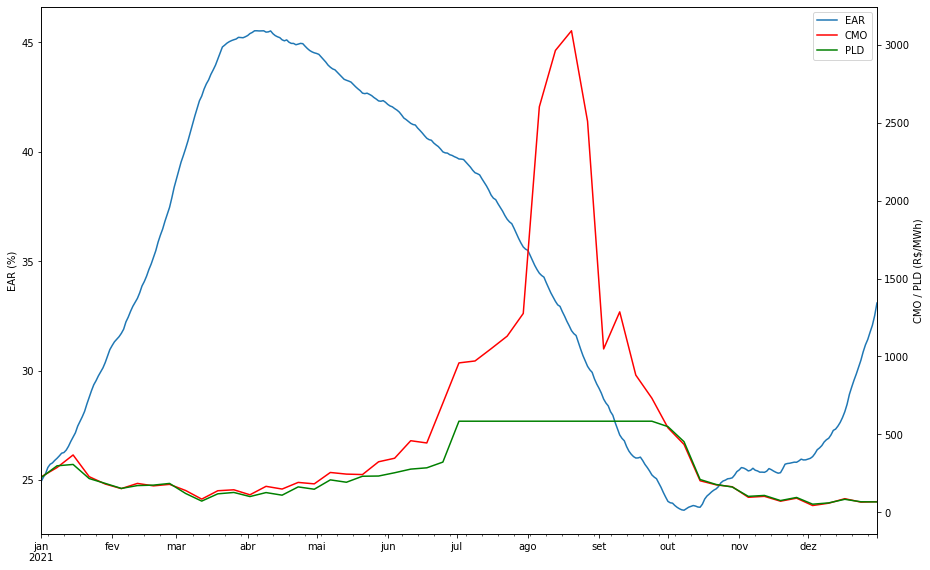

In [138]:
ax = EAR_total_sin_porcentagem[final_EAR_dataframe.index.year==2021].plot(ylabel='EAR (%)', xlabel='', label='EAR',figsize=(13,8))
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.index.year==2021][final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.index.year==2021][final_CMO_dataframe.columns[11]].index
y_pld = plot_df['PLD_SUDESTE'].values
x_pld = plot_df['PLD_SUDESTE'].index
ax2.plot(x,y, color='red', label='CMO')
ax2.plot(x_pld,y_pld, color='green', label='PLD')
ax2.set_ylabel('CMO / PLD (R$/MWh)')
line2 = ax2.lines



lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper right', fontsize=10)
plt.tight_layout(pad=1)
plt.savefig('FIGURAS\\EAR_PLD_CMO_DURANTE_CRISE.svg')

# Criação de dataframe a partir da série

In [139]:
armazenamento_total_df = pd.DataFrame(columns=['EAR%'])

In [140]:
armazenamento_total_df['EAR%'] = EAR_total_sin_porcentagem

# Criação dos dados de análise de recuperação e depleção da EAR

- Recuperação se refere a variação entre a EAR no primeiro dia do ano e o seu valor máximo
- Depleção se refere a variação entre o valor máximo da EAR no ano e o seu valor mínimo no segundo semestre

In [141]:
recuperacao_deplecao_df = armazenamento_total_df.resample('YS').agg(['first','max'])['EAR%']

In [142]:
recuperacao_deplecao_df['min'] = armazenamento_total_df.loc[lambda x: x.index.month>7].resample('YS').agg(['min'])['EAR%']

In [143]:
recuperacao_deplecao_df['Variação'] = recuperacao_deplecao_df['max'] - recuperacao_deplecao_df['first']
recuperacao_deplecao_df['Variação_f'] = (recuperacao_deplecao_df['min'] - recuperacao_deplecao_df['max'])

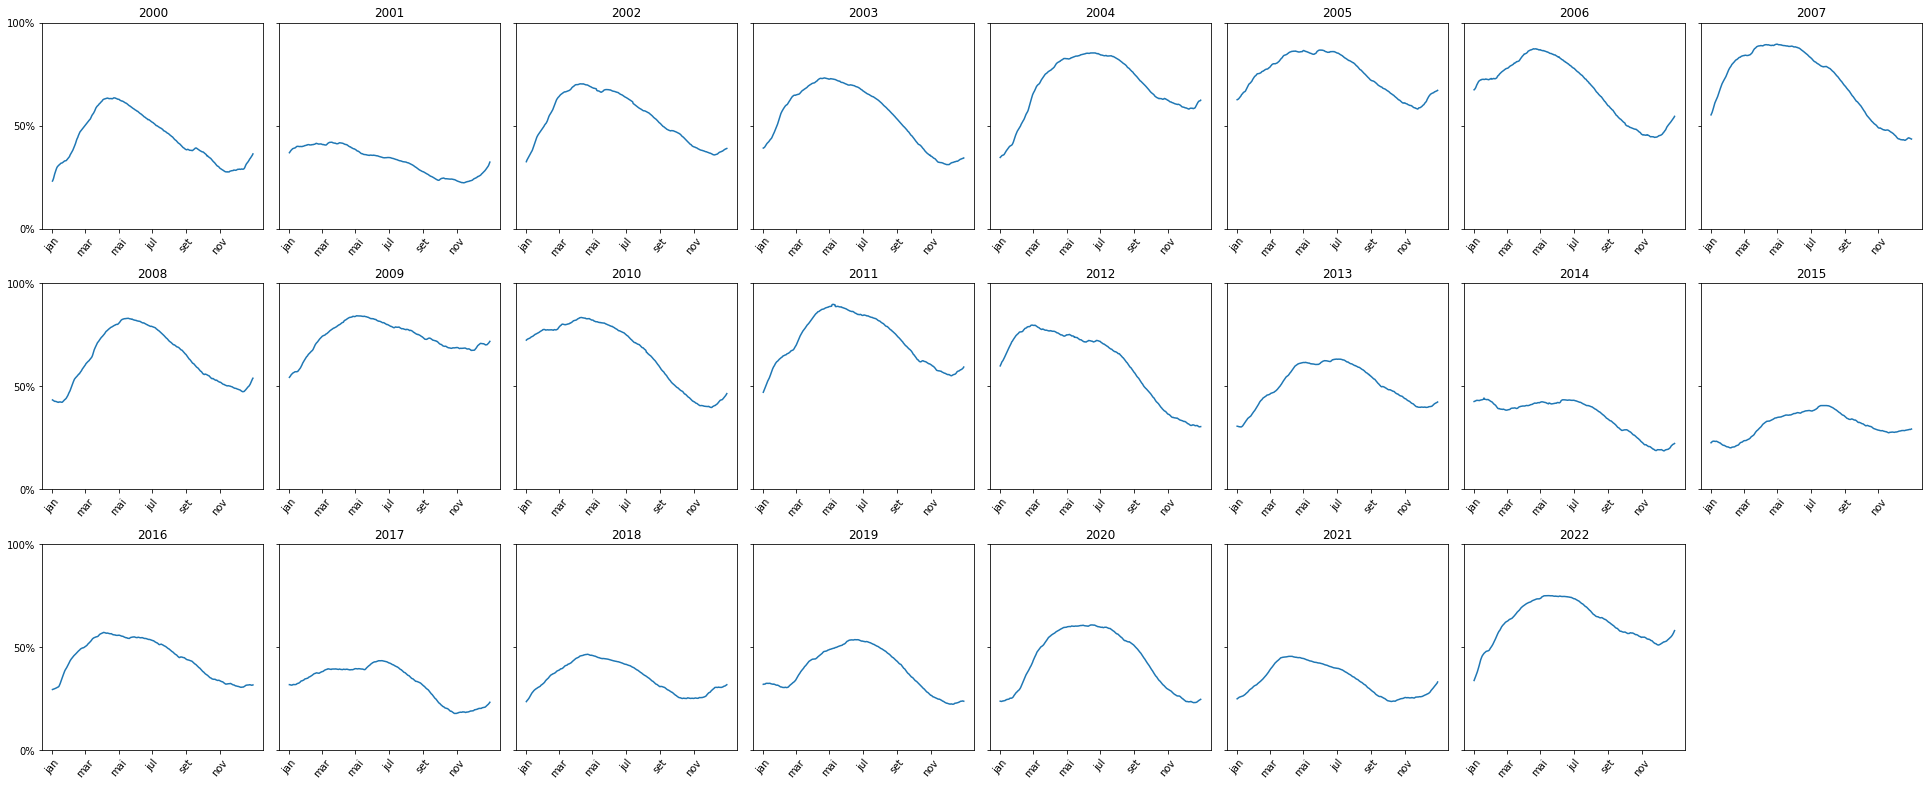

In [144]:
n_rows=3
n_columns = 24//n_rows

fig, ax = plt.subplots(n_rows,n_columns)
fig.set_size_inches(27/8*n_columns, 11/3*n_rows)


a = list(range(n_rows))
b = list(range(n_columns))
generator = ((element_a,element_b) for element_a in a for element_b in b)



for year in range(2000,2024):
    index = next(generator)
    axis = ax[index[0]][index[1]]

    x=armazenamento_total_df.loc[lambda x: x.index.year==year].index
    y=armazenamento_total_df.loc[lambda x: x.index.year==year]['EAR%'].values

    axis.plot(x,y)
    
    axis.set_yticks([0,50,100])
    axis.set_title(str(year))

    if index[1]==0:
        axis.set_yticklabels(['0%','50%','100%'])
    else:
        axis.set_yticklabels(['','',''])


    daterange = pd.date_range(start =f'{year}-01-01', end =f'{year}-12-31', freq ='2MS')
    label = [datetime.datetime.strftime(date,'%b') for date in daterange]
    axis.set_xticks(daterange)
    axis.set_xticklabels(label)

    axis.tick_params(axis='x',rotation=50)

fig.tight_layout(pad=1)

ax[-1][-1].axis('off')
ax[-1][-1].set_title('')
ax[-1][-1].lines[0].remove()

plt.savefig('FIGURAS\\EAR GRID.svg')


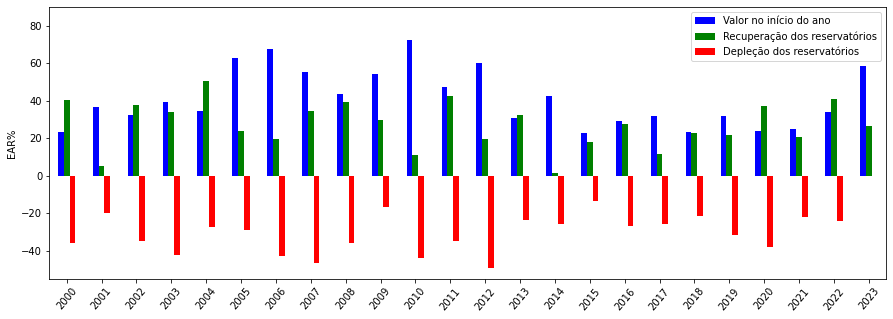

In [145]:
ax = recuperacao_deplecao_df[['first', 'Variação', 'Variação_f']].plot(kind='bar', figsize=(15,5), color=['blue','green','red'])
ax.set_xticklabels([datetime.datetime.strftime(date,'%Y') for date in recuperacao_deplecao_df.index ])
ax.tick_params(axis='x',rotation=50)
ax.legend(['Valor no início do ano','Recuperação dos reservatórios','Depleção dos reservatórios'])
ax.set_xlabel('')
ax.set_ylabel('EAR%')
ax.set_ylim((-55,90))
plt.savefig('FIGURAS\\GRAFICOS_RECUPERACAO_DEPLECAO.svg')

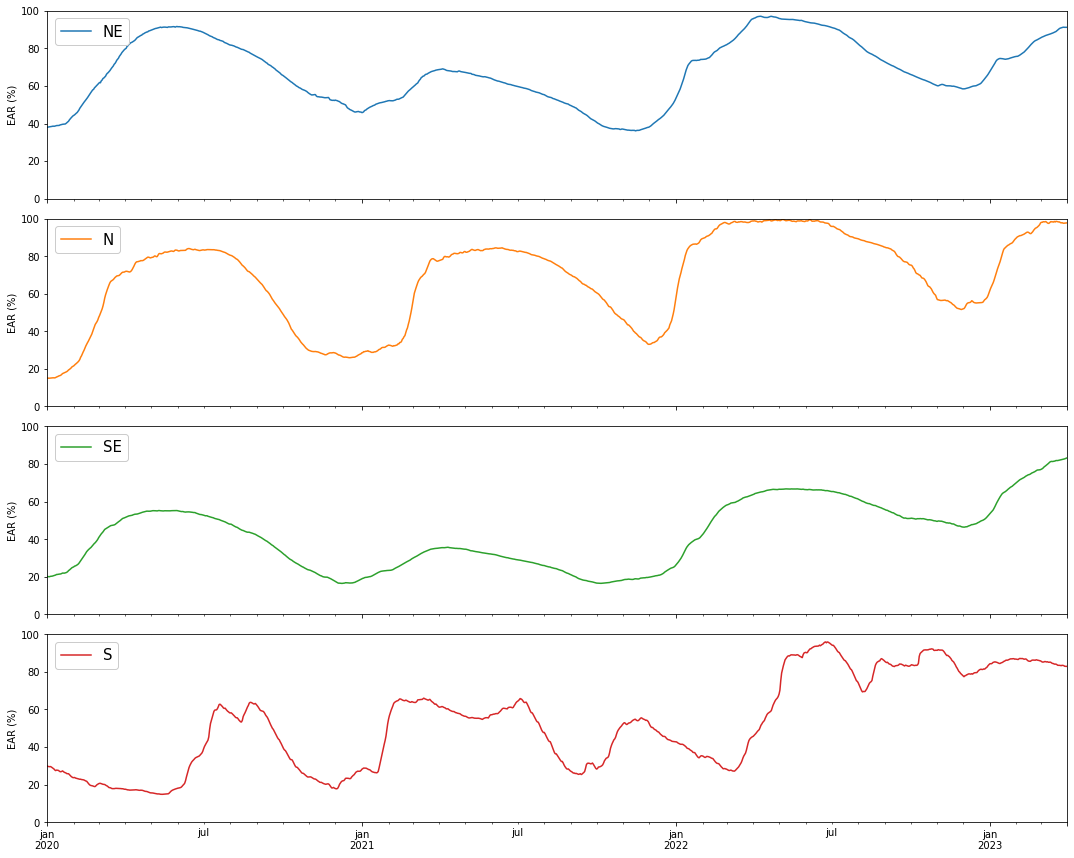

In [146]:
pos=['upper left', 'upper left', 'upper left', 'upper left']
subsystems=['NE','N','SE','S']
subplots = final_EAR_dataframe.loc[lambda x: x.index.year>=2020][final_EAR_dataframe.columns[2::3]].plot(subplots=True, layout=(4,1), figsize=(15,12), ylabel='EAR (%)', ylim=(0,100), xlabel='')
for i, subplop in enumerate(subplots):
    subplop[0].legend([subsystems[i]], loc=pos[i], framealpha=1, fontsize=15)
    
plt.tight_layout(pad=1)
_ = plt.savefig('FIGURAS\\Níveis_Energia_Armazenada.svg')

# Gráfico destacando os principais momentos observados nas atas do CMSE durante a crise hídrica de 2021

Text(2020-06-02 00:00:00, 26, 'Início\ndo Despacho\nFora de Ordem\nde Mérito\nPara Atender\n o Subsistema Sul')

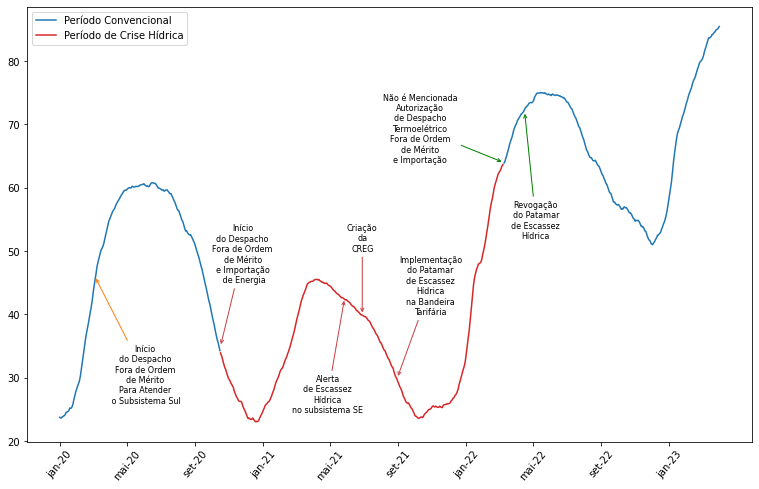

In [147]:
fig, ax = plt.subplots()

fig.set_size_inches(13,8)
#EAR_TOTAL.loc[lambda x: x.index.year>=2020].plot()
y = armazenamento_total_df.loc[lambda x: (x.index.year>=2020)& (x.index<'2020-10-16')].values
x1 = armazenamento_total_df.loc[lambda x: (x.index.year>=2020)& (x.index<'2020-10-16')].index
ax.plot(x1,y, color='#1f77b4', label='Período Convencional')

y = armazenamento_total_df.loc[lambda x: (x.index>='2020-10-16')& (x.index<'2022-03-09')].values
x = armazenamento_total_df.loc[lambda x: (x.index>='2020-10-16')& (x.index<'2022-03-09')].index
ax.plot(x,y, color='#d62728', label='Período de Crise Hídrica')

y = armazenamento_total_df.loc[lambda x: (x.index>'2022-03-09')].values
x2 = armazenamento_total_df.loc[lambda x: (x.index>'2022-03-09')].index
ax.plot(x2,y, color='#1f77b4')

daterange = pd.date_range(start =x1[0], 
         end =x2[-1], freq ='4MS')
label = [datetime.datetime.strftime(date,'%b-%y') for date in daterange]

plt.legend()


ax.set_xticks(daterange)
ax.set_xticklabels(label)
ax.tick_params(axis='x',rotation=50)

altura = 40
color='k'
data = '2021-06-28'
ax.annotate('Criação\nda\nCREG', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data,'%Y-%m-%d'), altura+10),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 42.5
color='k'
data = '2021-05-27'
offset = -18
ax.annotate('Alerta\nde Escassez\nHídrica\nno subsistema SE', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data,'%Y-%m-%d')- datetime.timedelta(days=30), altura+offset),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 30
color='k'
data = '2021-08-30'
ax.annotate('Implementação\ndo Patamar\nde Escassez\nHídrica\nna Bandeira\nTarifária', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=60), altura+10),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 72
color='k'
data = '2022-04-16'
ax.annotate('Revogação\ndo Patamar\nde Escassez\nHídrica', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=20), altura-20),arrowprops = dict(arrowstyle='->',color ='g'), color=color, ha='center', fontsize=8)

altura = 64
color='k'
data = '2022-03-09'
ax.annotate('Não é Mencionada\nAutorização\nde Despacho\nTermoelétrico\nFora de Ordem\nde Mérito\ne Importação', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') - datetime.timedelta(days=150), altura),arrowprops = dict(arrowstyle='->',color ='g'), color=color, ha='center', fontsize=8)

altura = 35
color='k'
data = '2020-10-16'
ax.annotate('Início\ndo Despacho\nFora de Ordem\nde Mérito\ne Importação\n de Energia', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=40), altura+10),arrowprops = dict(arrowstyle='->',color ='#c94144'), color=color, ha='center', fontsize=8)

altura = 46
color='k'
data = '2020-03-04'
ax.annotate('Início\ndo Despacho\nFora de Ordem\nde Mérito\nPara Atender\n o Subsistema Sul', xy=(datetime.datetime.strptime(data,'%Y-%m-%d'),altura),xytext =(datetime.datetime.strptime(data ,'%Y-%m-%d') + datetime.timedelta(days=90), altura-20),arrowprops = dict(arrowstyle='->',color ='#ff7f0e'), color=color, ha='center', fontsize=8)